# About
* This is a public dataset where it can be found on [Kaggle Iris Species](https://www.kaggle.com/uciml/iris).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import andrews_curves, parallel_coordinates

In [2]:
location = 'data/Iris.csv'
df = pd.read_csv(location, index_col='Id')

# Exploratory Data Analysis

In [3]:
df.shape

(150, 5)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As we can see in the describe function result, dataset feature values don't have too much variation. Maximum values range in all feature variables are 2.5-7.9. So, I think it's not necessary to standardize the data because if we do, it won't have a high effect in the model accuracy.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
n_rows = df.shape[0]
species_count = df.Species.value_counts().sort_values(ascending=False)
species_percentage = round(species_count / n_rows * 100, 2)

df_species_distribution = pd.DataFrame({
    'count': species_count,
    'percentage': species_percentage
})
df_species_distribution

,count,percentage
Iris-setosa,50,33.33
Iris-versicolor,50,33.33
Iris-virginica,50,33.33


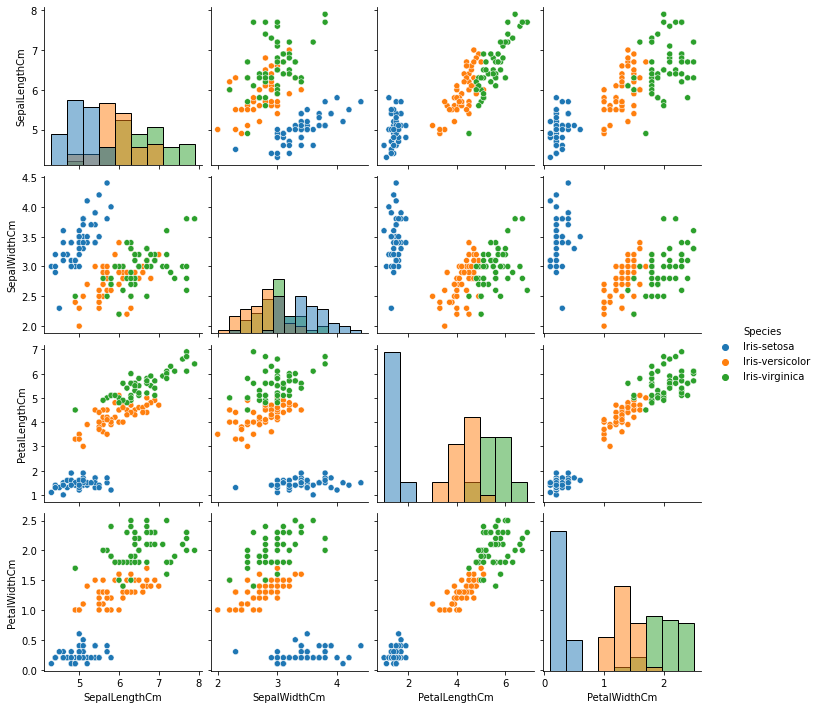

In [8]:
sns.pairplot(df, hue='Species', diag_kind='hist')

<AxesSubplot:>

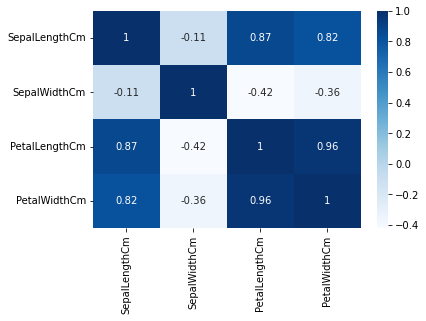

In [9]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

<AxesSubplot:>

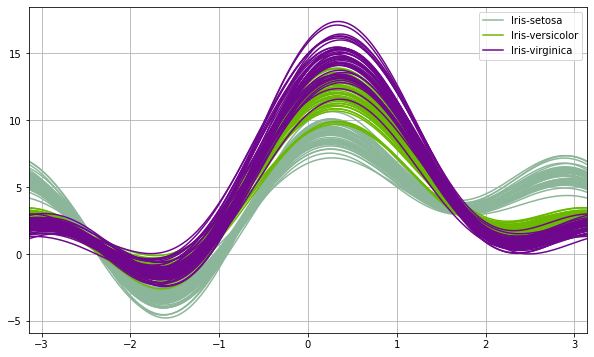

In [10]:
plt.figure(figsize=(10, 6))
andrews_curves(df, "Species")

<AxesSubplot:>

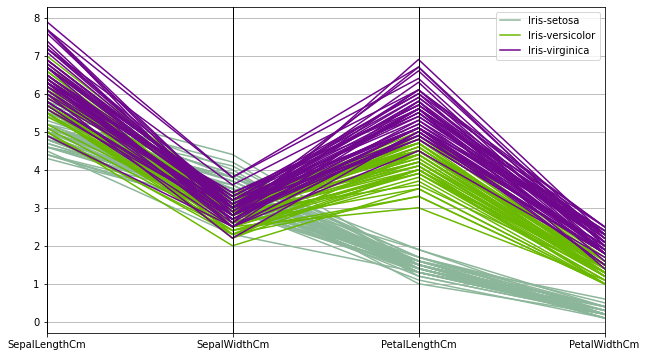

In [11]:
plt.figure(figsize=(10, 6))
parallel_coordinates(df, "Species")

# Choosing a model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Species', axis=1), df.Species, test_size=.25, random_state=21)

In [14]:
models = [SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]
cross_model_scores = list()

for model in models:
    cross_val_result = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_macro').mean()
    cross_model_scores.append(cross_val_result)
    
cross_model_scores

[0.9821937321937321, 0.9733333333333333, 0.991111111111111]

These model accuracy scores don't give us a real accuracy for the final model, but they can help us to choose the model type. So, I'm going to take the NeighborsClassifier model because it has the best accuracy. 

In [15]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import RandomizedSearchCV

In [16]:
model = KNeighborsClassifier()
parameters = {
    'n_neighbors': [3, 5, 6, 9, 11],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

random_search = RandomizedSearchCV(model, parameters, cv=3, scoring='f1_macro').fit(X_train, y_train)

In [17]:
model = random_search.best_estimator_

In [18]:
y_hat = model.predict(X_test)

In [19]:
confusion_matrix(y_test, y_hat)

array([[13,  0,  0],
       [ 0, 14,  1],
       [ 0,  1,  9]], dtype=int64)

In [20]:
score_result = f1_score(y_test, y_hat, average='micro')
f'The model accuracy is {round(score_result * 100, 2)}%'

'The model accuracy is 94.74%'